In [7]:
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

In [8]:
#import audio files
Flute_file = '/Users/jameswang/workspace/Audio Content Analysis/audios/FourInstrumentFiles_export/Fl-F4-mf.wav'
OB_File = '/Users/jameswang/workspace/Audio Content Analysis/audios/FourInstrumentFiles_export/Ob-F4-mf.wav'
Trumpet_file = '/Users/jameswang/workspace/Audio Content Analysis/audios/FourInstrumentFiles_export/TpC-F4-mf.wav'
Violin_file = '/Users/jameswang/workspace/Audio Content Analysis/audios/FourInstrumentFiles_export/Vn-F4-mf.wav'
Flute, sr = librosa.load(Flute_file, sr=None)
OB, sr = librosa.load(OB_File, sr=None)
Trumpet, sr = librosa.load(Trumpet_file, sr=None)
Violin, sr = librosa.load(Violin_file, sr=None)

In [9]:
#calculate Spectral Centroid
Flute_centroid = librosa.feature.spectral_centroid(y=Flute, sr=sr)
OB_centroid = librosa.feature.spectral_centroid(y=OB, sr=sr)
Trumpet_centroid = librosa.feature.spectral_centroid(y=Trumpet, sr=sr)
Violin_centroid = librosa.feature.spectral_centroid(y=Violin, sr=sr)

In [10]:
#calculate Spectral spread
Flute_spread = librosa.feature.spectral_bandwidth(y=Flute, sr=sr)
OB_spread = librosa.feature.spectral_bandwidth(y=OB, sr=sr)
Trumpet_spread = librosa.feature.spectral_bandwidth(y=Trumpet, sr=sr)
Violin_spread = librosa.feature.spectral_bandwidth(y=Violin, sr=sr)

In [11]:
#calculate spectral flux
def spectral_flux(y, sr, n_fft=2048, hop_length=512):
    # Compute the Short-Time Fourier Transform (STFT)
    S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    
    # Normalize the spectrogram
    S_norm = S / np.sum(S, axis=0, keepdims=True)
    
    # Compute the spectral flux
    flux = np.sqrt(np.sum(np.diff(S_norm, axis=1)**2, axis=0))
    
    return flux

Flute_flux = spectral_flux(Flute, sr)
OB_flux = spectral_flux(OB, sr)
Trumpet_flux = spectral_flux(Trumpet, sr)
Violin_flux = spectral_flux(Violin, sr)

In [12]:
#calculate MFCCs
Flute_mfccs = librosa.feature.mfcc(y=Flute, sr=sr, n_mfcc=13)
OB_mfccs = librosa.feature.mfcc(y=OB, sr=sr, n_mfcc=13)
Trumpet_mfccs = librosa.feature.mfcc(y=Trumpet, sr=sr, n_mfcc=13)
Violin_mfccs = librosa.feature.mfcc(y=Violin, sr=sr, n_mfcc=13)

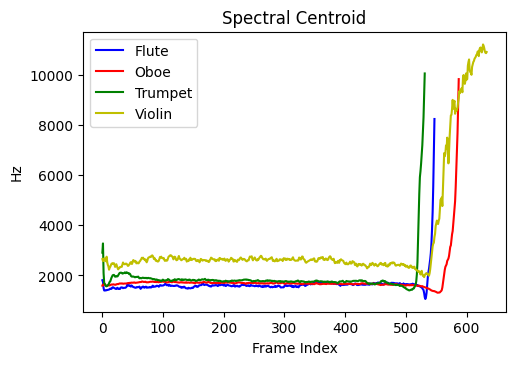

In [20]:
#visualization centroid for all four instruments
labels = ['Flute', 'Oboe', 'Trumpet', 'Violin']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars   
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(Flute_centroid[0], label='Flute', color='b')
plt.plot(OB_centroid[0], label='Oboe', color='r')
plt.plot(Trumpet_centroid[0], label='Trumpet', color='g')
plt.plot(Violin_centroid[0], label='Violin', color='y')
plt.title('Spectral Centroid')
plt.xlabel('Frame Index')
plt.ylabel('Hz')
plt.legend()
plt.show()

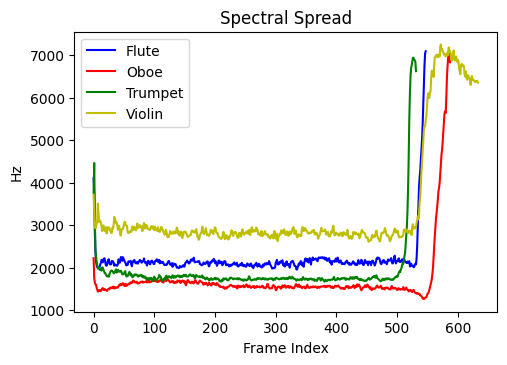

In [21]:
#plot spectral spread for all four instruments
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(Flute_spread[0], label='Flute', color='b')
plt.plot(OB_spread[0], label='Oboe', color='r')
plt.plot(Trumpet_spread[0], label='Trumpet', color='g')
plt.plot(Violin_spread[0], label='Violin', color='y')
plt.title('Spectral Spread')
plt.xlabel('Frame Index')
plt.ylabel('Hz')
plt.legend()
plt.show()

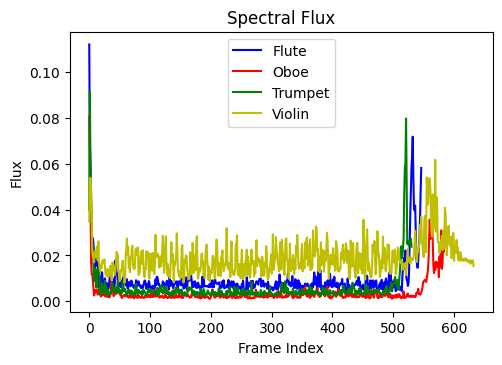

In [25]:
#plot spectral flux for all four instruments
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(Flute_flux, label='Flute', color='b')
plt.plot(OB_flux, label='Oboe', color='r')
plt.plot(Trumpet_flux, label='Trumpet', color='g')
plt.plot(Violin_flux, label='Violin', color='y')
plt.title('Spectral Flux')
plt.xlabel('Frame Index')
plt.ylabel('Flux')
plt.legend()
plt.show()

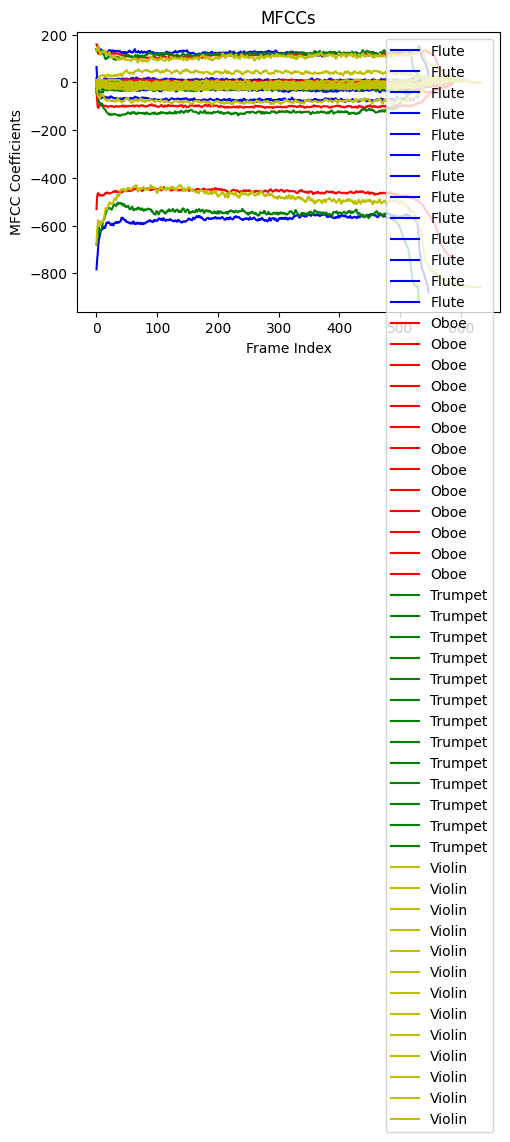

In [24]:
#plot mfccs for all four instruments
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(Flute_mfccs.T, label='Flute', color='b')               
plt.plot(OB_mfccs.T, label='Oboe', color='r')
plt.plot(Trumpet_mfccs.T, label='Trumpet', color='g')
plt.plot(Violin_mfccs.T, label='Violin', color='y')
plt.title('MFCCs')
plt.xlabel('Frame Index')
plt.ylabel('MFCC Coefficients')
plt.legend()
plt.show()